---
### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fredapi import Fred
from private_utils import MY_FRED_API_KEY

from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

ModuleNotFoundError: No module named 'fredapi'

---
### FRED API Data Pulls
 - Debt Service Ratios
 - Mortgate Interest Rates
 - 30+ Day Delinquencies
 - Chained CPIs
 - Case-Shiller National HPI

In [2]:
fred = Fred(api_key=MY_FRED_API_KEY)

#### Disposable Income & Debt Service Features

In [4]:
# Disposable Income
dspi = fred.get_series('DSPI')

In [5]:
# Population
pop_pi = fred.get_series('POPTHM')

In [6]:
# Total Debt Service
tdsp = fred.get_series('TDSP')

In [7]:
# Mortgage Debt Service
mdsp = fred.get_series('MDSP')

In [8]:
# Consumer Debt Service
cdsp = fred.get_series('CDSP')

#### Mortgage Interest Rate Features

In [9]:
# 30YR Fixed Rate
fix_mtg = fred.get_series('MORTGAGE30US')

In [10]:
# 5/1 Adjustable Rate
adj_mtg = fred.get_series('MORTGAGE5US')

In [11]:
# 15YR Fixed Rate
fix_mtg_2 = fred.get_series('MORTGAGE15US')

#### 30+ Day Delinquency Rate Features

In [12]:
# All Loan, Lease DQs
all_dq = fred.get_series('DRALACBS')

In [13]:
# All Real Estate Loan DQs
re_dq = fred.get_series('DRSREACBS')

In [14]:
# Residential Mortgage DQs
mtg_dq = fred.get_series('DRSFRMACBS')

In [15]:
# Commercial Mortgage DQs
biz_mtg_dq = fred.get_series('DRCRELEXFACBS')

In [16]:
# Agricultural Mortgage DQs
ag_mtg_dq = fred.get_series('DRFLACBS')

In [17]:
# All Consumter Loan DQs
con_ln_dq = fred.get_series('DRCLACBS')

In [18]:
# Credit Card DQs
con_crdt_dq = fred.get_series('DRCCLACBS')

In [19]:
# Other Consumer Debt DQs
oth_con_dq = fred.get_series('DROCLACBS')

In [20]:
# Lease DQs
lease_dq = fred.get_series('DRLFRACBS')

In [21]:
# C&I Loan DQs
ci_ln_dq = fred.get_series('DRBLACBS')

In [22]:
# Agricultural Loan DQs
ag_ln_dq = fred.get_series('DRFAPGACBS')

#### Chained CPI-U Features

In [4]:
# All Items CPI
all_cpi = fred.get_series('SUUR0000SA0')

In [5]:
# All Items Less Food and Energy CPI
all_no_fe_cpi = fred.get_series('SUUR0000SA0L1E')

In [6]:
# Shelter CPI
shelter_cpi = fred.get_series('SUUR0000SAH1')

#### Case-Shiller HPI Feature

In [26]:
# CS National HPI
cs_natl = fred.get_series('CSUSHPISA')

---
### Creating Initial Datasets
 - Disposable Personal Income and Debt Service
 - Mortage Interest Rates
 - Delinquency Rates
 - Chained CPI-U
 - Case-Shiller National HPI
 
 - Mortgage Purchase Index (___non-FRED___)

#### Disposable Personal Income and Debt Service Datasets

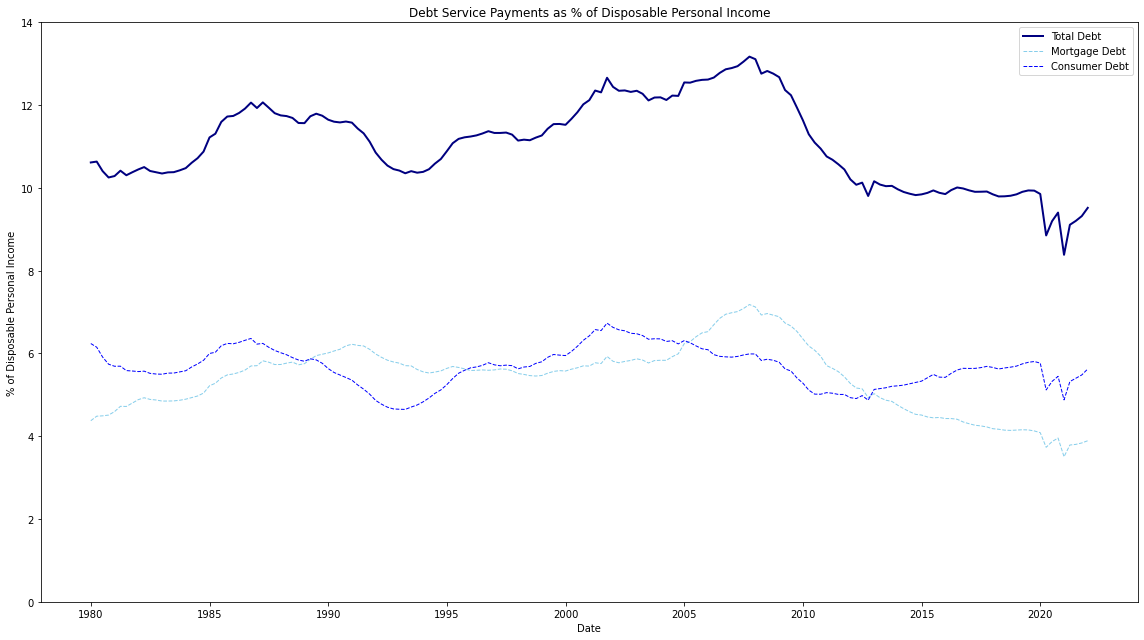

In [27]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(tdsp).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(tdsp).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Total Debt')

sns.lineplot(x=pd.DataFrame(mdsp).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(mdsp).reset_index()[0],
             linewidth=1,
             alpha=1,
             color='skyblue',
             linestyle='--',
             label='Mortgage Debt')

sns.lineplot(x=pd.DataFrame(cdsp).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(cdsp).reset_index()[0],
             linewidth=1,
             alpha=1,
             color='blue',
             linestyle='--',
             label='Consumer Debt')

plt.ylim([0, round(max(pd.DataFrame(tdsp).reset_index()[0])*1.1,0) ])
plt.ylabel('% of Disposable Personal Income')
plt.xlabel('Date')
plt.title('Debt Service Payments as % of Disposable Personal Income') # reported for Qn at end of Qn+1
plt.tight_layout() # include 'Disposable Personal Income (Qtr)'

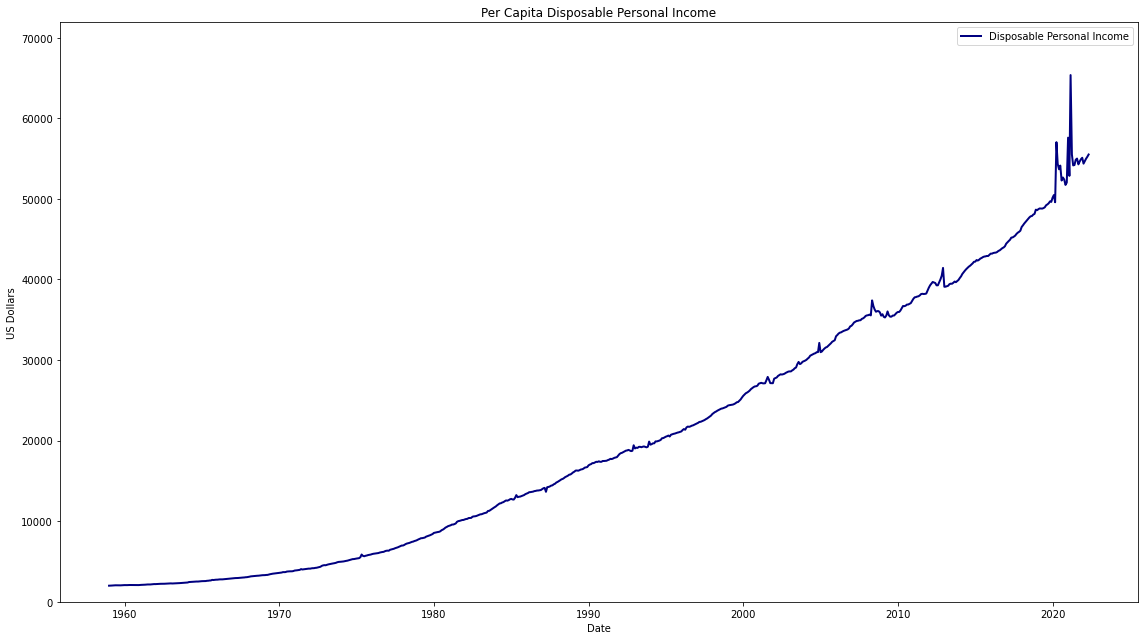

In [36]:
per_capita_dspi = (dspi*1_000_000_000) / (pop_pi*1_000)

plt.figure(figsize=(16,9))

sns.lineplot(x=pd.DataFrame(per_capita_dspi).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(per_capita_dspi).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Disposable Personal Income')

plt.ylim([0, round(max(pd.DataFrame(per_capita_dspi).reset_index()[0])*1.1,0) ])
plt.ylabel('US Dollars')
plt.xlabel('Date')
plt.title('Per Capita Disposable Personal Income')
plt.tight_layout()

In [79]:
pd.concat(
    [pd.DataFrame(per_capita_dspi, columns=['per_capita_disp_pi']), pd.DataFrame(dspi, columns=['disp_personal_inc']), pd.DataFrame(pop_pi, columns=['population'])],
    axis=1
).to_csv('./data/personal_income.csv', index=True, index_label='index')

In [66]:
pd.concat(
    [pd.DataFrame(tdsp, columns=['total_debt']), pd.DataFrame(mdsp, columns=['mortgage_debt']), pd.DataFrame(cdsp, columns=['consumer_debt'])],
    axis=1
).to_csv('./data/debt_service.csv', index=True, index_label='index')

#### Mortgage Interest Rates

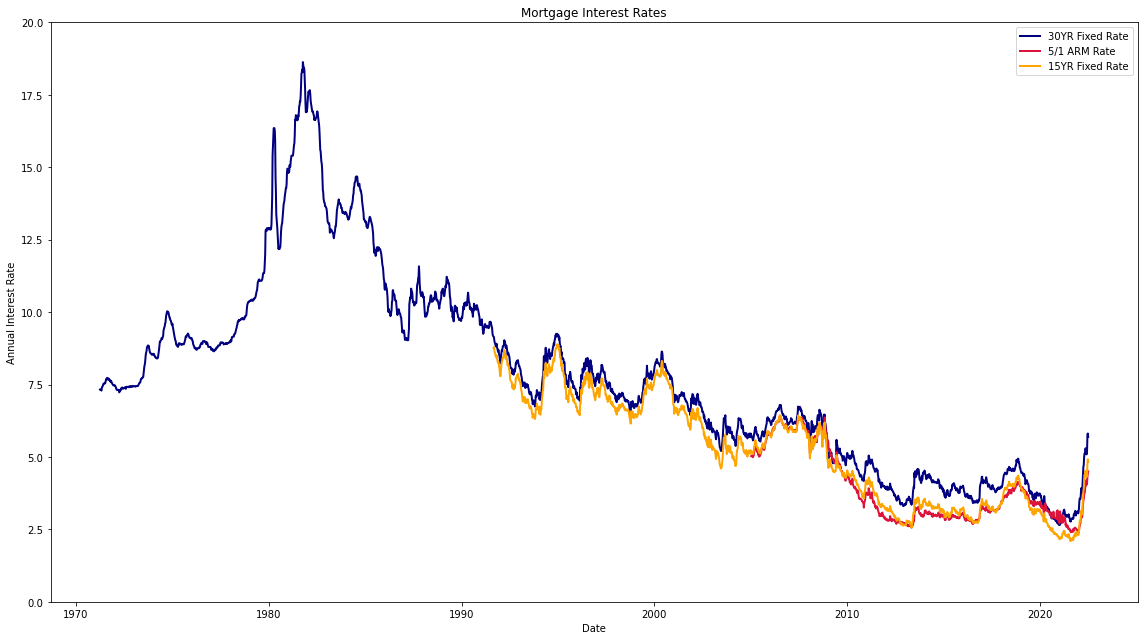

In [41]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(fix_mtg).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(fix_mtg).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='30YR Fixed Rate')

sns.lineplot(x=pd.DataFrame(adj_mtg).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(adj_mtg).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='crimson',
             linestyle='-',
             label='5/1 ARM Rate')

sns.lineplot(x=pd.DataFrame(fix_mtg_2).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(fix_mtg_2).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='Orange',
             linestyle='-',
             label='15YR Fixed Rate')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([fix_mtg, adj_mtg, fix_mtg_2],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Annual Interest Rate')
plt.xlabel('Date')
plt.title('Mortgage Interest Rates')
plt.tight_layout()
#fix_mtg[-548:-25]

In [80]:
pd.concat(
    [pd.DataFrame(fix_mtg, columns=['fixed_mortgage_30']), pd.DataFrame(adj_mtg, columns=['adjustable_mortgage']), pd.DataFrame(fix_mtg_2, columns=['fixed_mortgage_15'])],
    axis=1
).to_csv('./data/mortgage_rates.csv', index=True, index_label='index')

#### Delinquency Rates

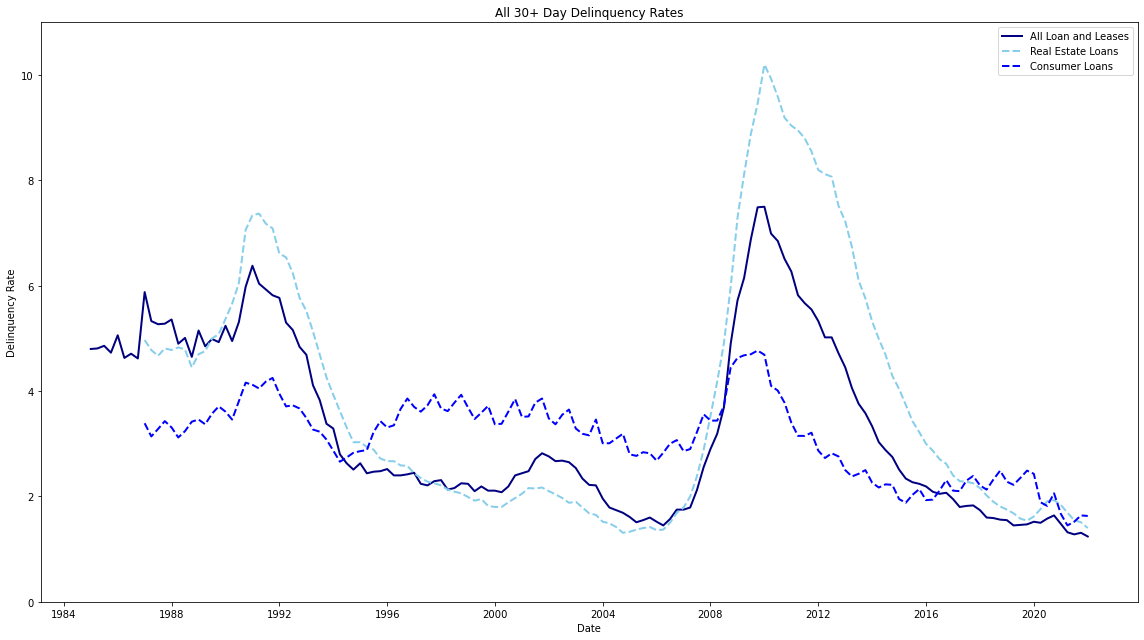

In [44]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(all_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(all_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='All Loan and Leases')

sns.lineplot(x=pd.DataFrame(re_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(re_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='skyblue',
             linestyle='--',
             label='Real Estate Loans')

sns.lineplot(x=pd.DataFrame(con_ln_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(con_ln_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='blue',
             linestyle='--',
             label='Consumer Loans')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([all_dq, re_dq, con_ln_dq],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Delinquency Rate')
plt.xlabel('Date')
plt.title('All 30+ Day Delinquency Rates')
plt.tight_layout()

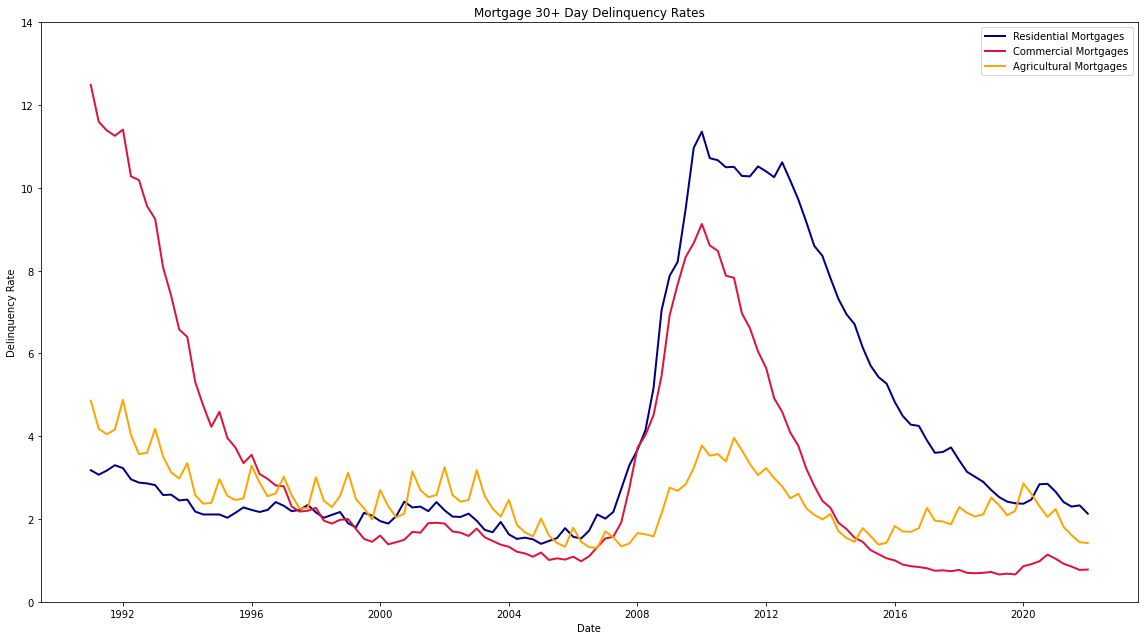

In [46]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(mtg_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(mtg_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Residential Mortgages')

sns.lineplot(x=pd.DataFrame(biz_mtg_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(biz_mtg_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='crimson',
             linestyle='-',
             label='Commercial Mortgages')

sns.lineplot(x=pd.DataFrame(ag_mtg_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(ag_mtg_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='orange',
             linestyle='-',
             label='Agricultural Mortgages')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([mtg_dq, biz_mtg_dq, ag_mtg_dq],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Delinquency Rate')
plt.xlabel('Date')
plt.title('Mortgage 30+ Day Delinquency Rates')
plt.tight_layout()

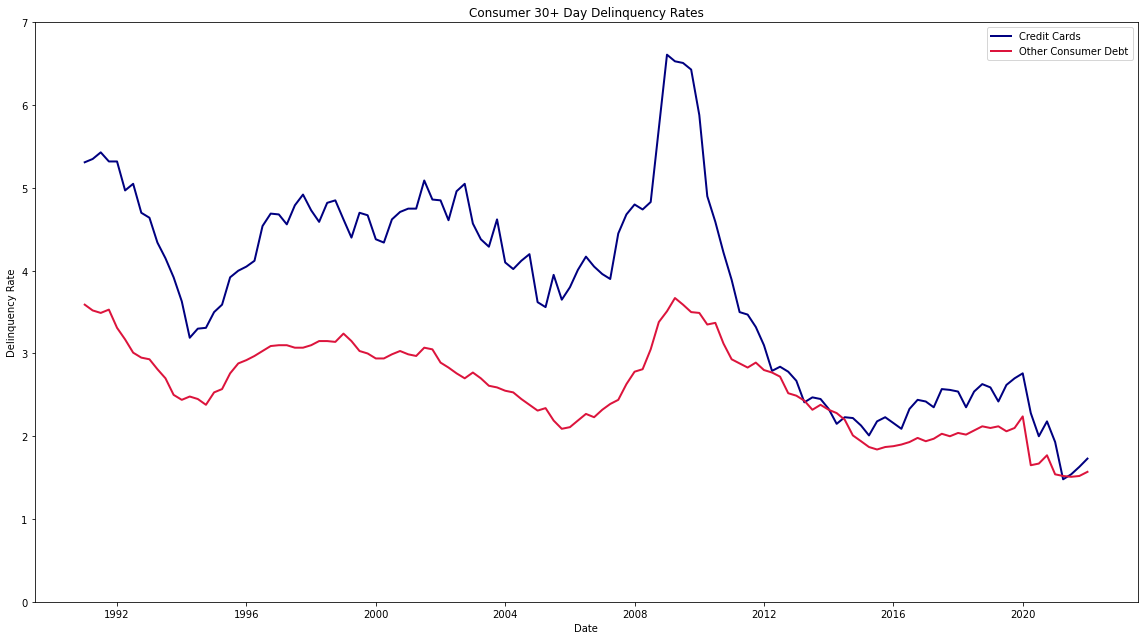

In [47]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(con_crdt_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(con_crdt_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Credit Cards')

sns.lineplot(x=pd.DataFrame(oth_con_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(oth_con_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='crimson',
             linestyle='-',
             label='Other Consumer Debt')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([con_crdt_dq, oth_con_dq],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Delinquency Rate')
plt.xlabel('Date')
plt.title('Consumer 30+ Day Delinquency Rates')
plt.tight_layout()

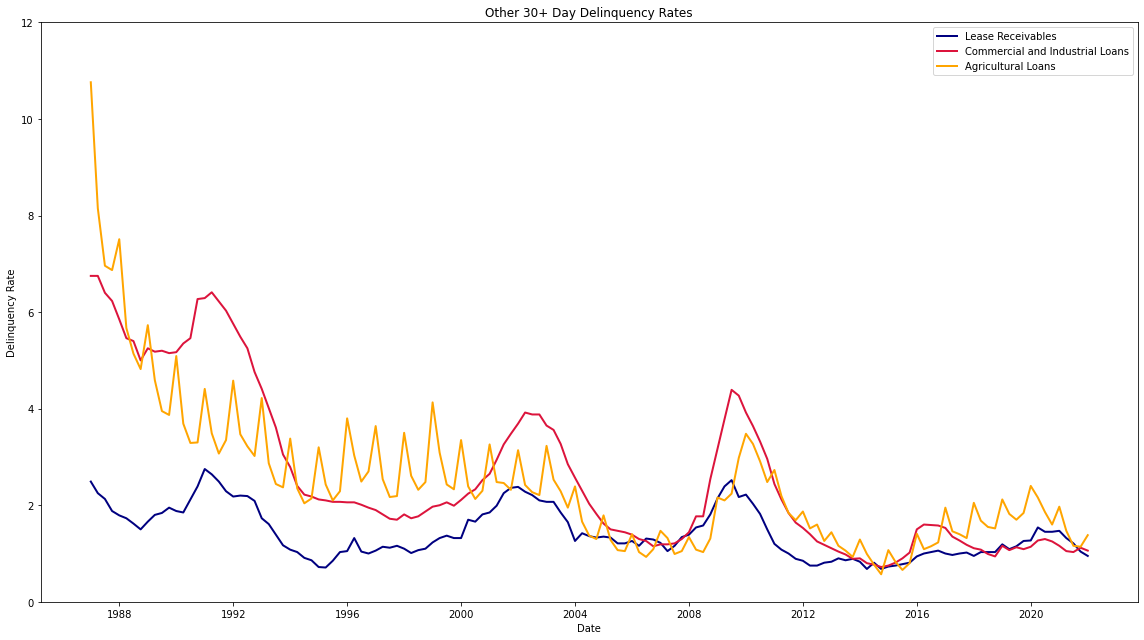

In [49]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(lease_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(lease_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Lease Receivables')

sns.lineplot(x=pd.DataFrame(ci_ln_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(ci_ln_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='crimson',
             linestyle='-',
             label='Commercial and Industrial Loans')

sns.lineplot(x=pd.DataFrame(ag_ln_dq).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(ag_ln_dq).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='orange',
             linestyle='-',
             label='Agricultural Loans')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([lease_dq, ci_ln_dq, ag_ln_dq],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Delinquency Rate')
plt.xlabel('Date')
plt.title('Other 30+ Day Delinquency Rates')
plt.tight_layout()

In [78]:
pd.concat(
    [pd.DataFrame(all_dq, columns=['all']),
     pd.DataFrame(re_dq, columns=['all_real_estate']),
     pd.DataFrame(mtg_dq, columns=['residential_mtg']),
     pd.DataFrame(biz_mtg_dq, columns=['commercial_mtg']),
     pd.DataFrame(ag_mtg_dq, columns=['agricultural_mtg']),
     pd.DataFrame(con_ln_dq, columns=['all_con_ln_dq']),
     pd.DataFrame(con_crdt_dq, columns=['con_credit_card']),
     pd.DataFrame(oth_con_dq, columns=['other_con_ln']),
     pd.DataFrame(lease_dq, columns=['lease']),
     pd.DataFrame(ci_ln_dq, columns=['commercial_ln']),
     pd.DataFrame(ag_ln_dq, columns=['agricultural_ln'])],
    axis=1
).to_csv('./data/delinquency_rates.csv', index=True, index_label='index')

#### Chained CPI Datasets

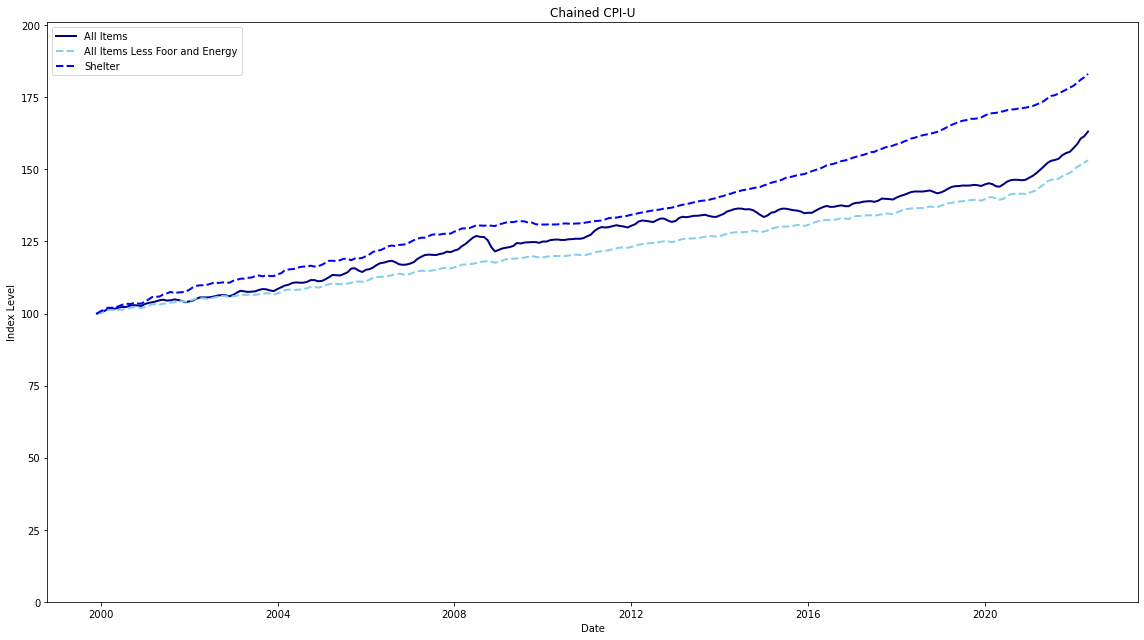

In [7]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(all_cpi).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(all_cpi).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='All Items')

sns.lineplot(x=pd.DataFrame(all_no_fe_cpi).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(all_no_fe_cpi).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='skyblue',
             linestyle='--',
             label='All Items Less Foor and Energy')

sns.lineplot(x=pd.DataFrame(shelter_cpi).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(shelter_cpi).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='blue',
             linestyle='--',
             label='Shelter')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([all_cpi, all_no_fe_cpi, shelter_cpi],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('Index Level')
plt.xlabel('Date')
plt.title('Chained CPI-U')
plt.tight_layout()

In [8]:
#pd.DataFrame(ccpiu, columns=['ccpiu_shelter']).reset_index().to_csv('./data/chained_cpi_shelter.csv', index=False)

In [9]:
pd.concat(
    [pd.DataFrame(all_cpi, columns=['all_items']), pd.DataFrame(all_no_fe_cpi, columns=['all_items_no_fe']), pd.DataFrame(shelter_cpi, columns=['shelter'])],
    axis=1
).to_csv('./data/chained_cpi.csv', index=True, index_label='index')

#### Case-Shiller Nat'l Home Price Index

In [57]:
cs_natl_2 = cs_natl.dropna()

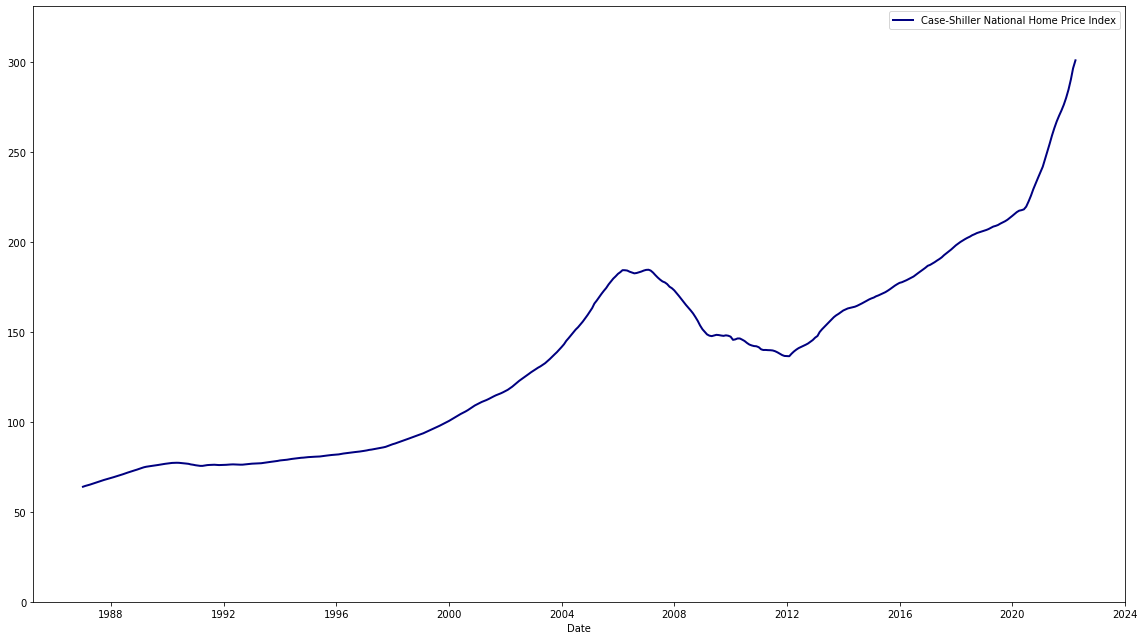

In [58]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(cs_natl_2).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(cs_natl_2).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='Case-Shiller National Home Price Index')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([cs_natl_2],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('')
plt.xlabel('Date')
plt.title('') # reported for ...
plt.tight_layout()

In [60]:
pd.DataFrame(cs_natl_2, columns=['case_shiller_natl']).reset_index().to_csv('./data/case_shiller.csv', index=False)

#### US MBA Mortgage Purchase Index (Applications)

In [67]:
mba_pi = pd.read_csv('./data/data_raw/mba_purchase_index.csv')

In [68]:
mba_pi = mba_pi.drop(columns=['time'])

In [69]:
mba_pi['release_date'] = pd.to_datetime(mba_pi['release_date'])

In [70]:
mba_pi = mba_pi.set_index(mba_pi['release_date'], drop=False).drop(columns=['release_date'])

In [71]:
mba_pi = mba_pi.rename(columns={'index':0})

In [72]:
mba_pi.index.name = None

In [73]:
mba_pi = mba_pi.sort_index(ascending=True)

In [74]:
# drop everything before '17-SEP-2014'
mba_pi = mba_pi[mba_pi.index >= pd.Timestamp(date(2014,9,17))]

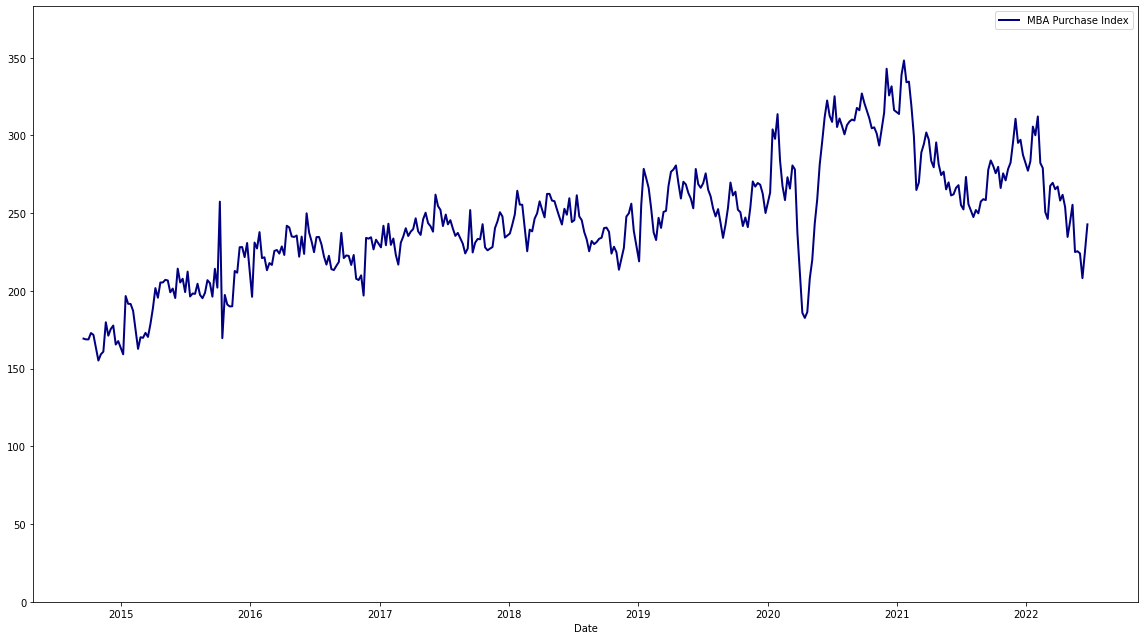

In [76]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(mba_pi).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(mba_pi).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='MBA Purchase Index')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([mba_pi],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('')
plt.xlabel('Date')
plt.title('') # reported for ...
plt.tight_layout()

In [77]:
mba_pi.rename(columns={0:'purchase_index'}).reset_index().to_csv('./data/mba_purchase_index_wk.csv', index=False)

#### US MBA Mortgage Purchase Index (Applications), PART 2

In [6]:
mba_pi_2 = pd.read_csv('./data/data_raw/mba_purchase_index.csv')

mba_pi_2 = mba_pi_2.drop(columns=['time'])

mba_pi_2['release_date'] = pd.to_datetime(mba_pi_2['release_date'])

mba_pi_2 = mba_pi_2.set_index(mba_pi_2['release_date'], drop=False).drop(columns=['release_date'])

mba_pi_2 = mba_pi_2.rename(columns={'index':0})

mba_pi_2.index.name = None

mba_pi_2 = mba_pi_2.sort_index(ascending=True)

mba_pi_2 = mba_pi_2[mba_pi_2.index < pd.Timestamp(date(2014,9,17))]

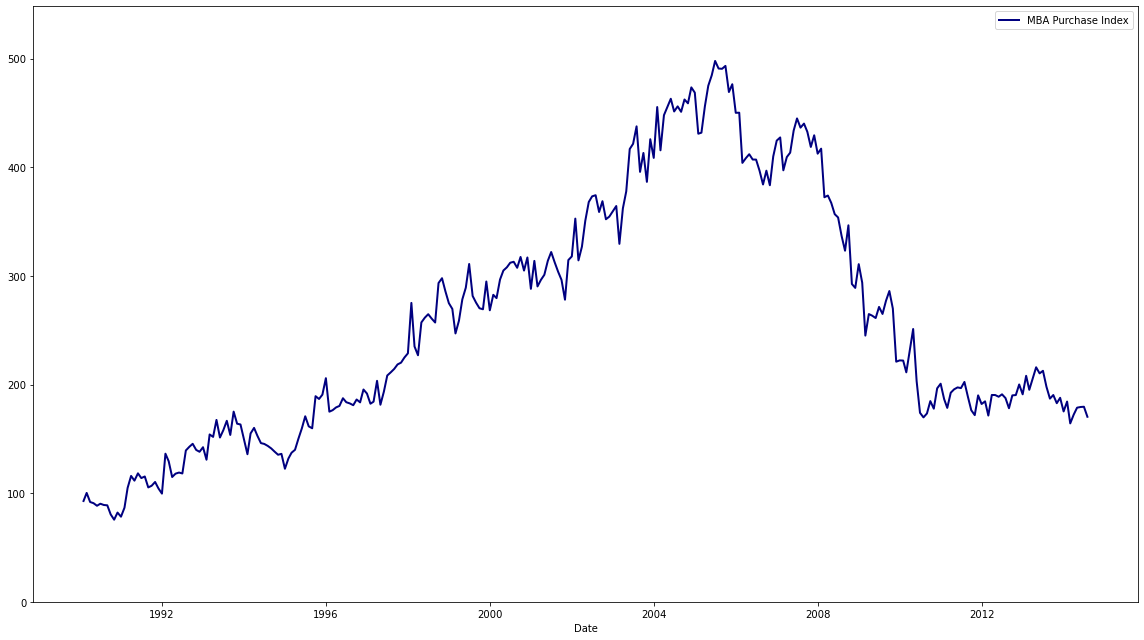

In [7]:
plt.figure(figsize=(16,9))
sns.lineplot(x=pd.DataFrame(mba_pi_2).reset_index()['index'].apply(lambda x: x + relativedelta(months=0) - timedelta(days=0)),
             y=pd.DataFrame(mba_pi_2).reset_index()[0],
             linewidth=2,
             alpha=1,
             color='navy',
             linestyle='-',
             label='MBA Purchase Index')

plt.ylim([0, round(max(pd.DataFrame(pd.concat([mba_pi_2],axis=1).max(axis=1)).reset_index()[0])*1.1,0) ])
plt.ylabel('')
plt.xlabel('Date')
plt.title('') # reported for ...
plt.tight_layout()

In [8]:
mba_pi_2.rename(columns={0:'purchase_index'}).reset_index().to_csv('./data/mba_purchase_index_mth.csv', index=False)